## Read Dataset

In [1]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 23.2MB/s]


In [4]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [5]:
import pandas as pd
dfPath = '/content/diabetes_prediction_dataset.csv'
df = pd.read_csv(dfPath)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Null Value Checking

In [7]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


## Data Encoding

In [8]:
categoricalColumn = ['gender', 'smoking_history']
df_encoded = pd.get_dummies(df, columns=categoricalColumn)
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,False,True,False


## Data Splitting
We split the data into train and test dataset

In [9]:
column = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current']

X = df_encoded[column]
y = df_encoded['diabetes']

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 1)

## Outliers Detection and Removal

In [11]:
Xtrain = Xtrain.join(ytrain)
Xtrain.drop_duplicates(subset=None, keep='first', inplace=True)

<ipython-input-12-2b57137ef1b6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, idx + 1)


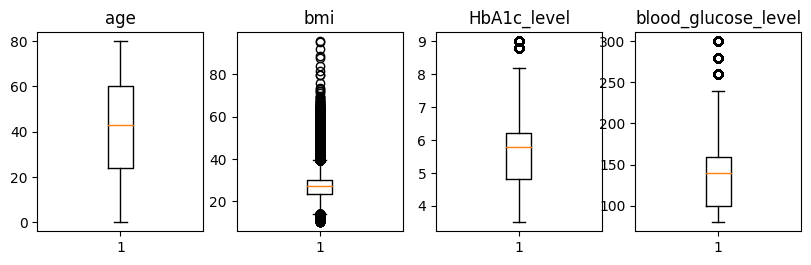

In [12]:
columns = ['age', 'bmi','HbA1c_level','blood_glucose_level']
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15))
for idx, name in enumerate(columns):
  plt.subplot(5, 6, idx + 1)
  plt.boxplot(Xtrain[name])
  plt.title(name)

In [13]:
#Outliers removal with IQR
selectedFeatures = ['bmi']
dfTemp = Xtrain
for index, names in enumerate(selectedFeatures):
    q1 = dfTemp[names].quantile(0.25)
    q3 = dfTemp[names].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5*iqr
    upperbound = q3 + 1.5*iqr
    outliers = Xtrain[(Xtrain[names] < lowerbound) | (Xtrain[names] > upperbound)]
    Xtrain = Xtrain.drop(outliers.index)

ytrain = Xtrain['diabetes']
Xtrain = Xtrain[column]

<ipython-input-14-2b57137ef1b6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, idx + 1)


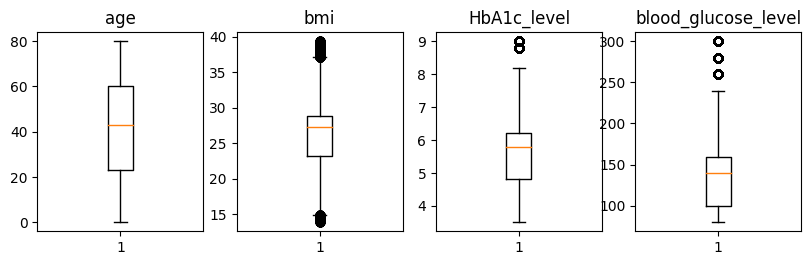

In [14]:
columns = ['age', 'bmi','HbA1c_level','blood_glucose_level']
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15))
for idx, name in enumerate(columns):
  plt.subplot(5, 6, idx + 1)
  plt.boxplot(Xtrain[name])
  plt.title(name)

## Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

print(Xtrain)
print('mean xs = ', np.round(np.mean(Xtrain)))
print('std dev xs =', np.round(np.std(Xtrain)))

[[ 0.27668979 -0.28057086 -0.20548364 ... -0.32278038  1.35127485
  -0.26637655]
 [ 0.36485865 -0.28057086 -0.20548364 ... -0.32278038  1.35127485
  -0.26637655]
 [ 0.9379562  -0.28057086 -0.20548364 ... -0.32278038  1.35127485
  -0.26637655]
 ...
 [-1.04584303 -0.28057086 -0.20548364 ... -0.32278038  1.35127485
  -0.26637655]
 [ 1.68739147  3.56416207 -0.20548364 ...  3.09808174 -0.74004189
  -0.26637655]
 [ 1.64330704 -0.28057086 -0.20548364 ... -0.32278038  1.35127485
  -0.26637655]]
mean xs =  0.0
std dev xs = 1.0


## Model Training and Evaluation with Original Features

### ANN Model (MLP Classifier)

#### Hyperparameter Tuning

In [17]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [18]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

def objective(trial):
    parameters = {'solver': 'adam',
                 'activation': trial.suggest_categorical('activation', ['logistic', 'relu']),
                 'max_iter': trial.suggest_int('max_iter', 1000, 5000),
                 'learning_rate_init': trial.suggest_float('learning_rate_init', 0.001, 0.01, step=0.001),
                 'early_stopping':True,
                 'verbose': False,
                 'random_state': 42}
    model = MLPClassifier(**parameters)
    scores = cross_val_score(model, Xtrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return acc

sampler = optuna.samplers.TPESampler(seed=42)
studyMLPOri = optuna.create_study(direction="maximize")
studyMLPOri.optimize(objective, n_trials = 20)

[I 2024-10-14 22:20:13,405] A new study created in memory with name: no-name-fb01af5d-5538-4c78-ae53-7c0b85c89f6d
[I 2024-10-14 22:21:11,111] Trial 0 finished with value: 0.9734485359665364 and parameters: {'activation': 'relu', 'max_iter': 3923, 'learning_rate_init': 0.008}. Best is trial 0 with value: 0.9734485359665364.
[I 2024-10-14 22:22:02,206] Trial 1 finished with value: 0.9643557567030103 and parameters: {'activation': 'logistic', 'max_iter': 2551, 'learning_rate_init': 0.003}. Best is trial 0 with value: 0.9734485359665364.
[I 2024-10-14 22:22:40,112] Trial 2 finished with value: 0.9731605293835287 and parameters: {'activation': 'relu', 'max_iter': 1645, 'learning_rate_init': 0.006}. Best is trial 0 with value: 0.9734485359665364.
[I 2024-10-14 22:24:04,015] Trial 3 finished with value: 0.9724062264280326 and parameters: {'activation': 'relu', 'max_iter': 1122, 'learning_rate_init': 0.001}. Best is trial 0 with value: 0.9734485359665364.
[I 2024-10-14 22:24:55,784] Trial 4 fi

In [19]:
trialMLPOri = studyMLPOri.best_trial
print(f"Accuracy: {trialMLPOri.value}")
print(f"Best hyperparameters: {trialMLPOri.params}")

Accuracy: 0.9735719673592539
Best hyperparameters: {'activation': 'relu', 'max_iter': 2928, 'learning_rate_init': 0.007}


In [20]:
parameters = {'solver': 'adam',
             'activation': trialMLPOri.params['activation'],
             'max_iter': trialMLPOri.params['max_iter'],
             'learning_rate_init': trialMLPOri.params['learning_rate_init'],
             'early_stopping':True,
             'verbose': True,
             'random_state': 42}
model = MLPClassifier(**parameters)
model.fit(Xtrain,ytrain)

Iteration 1, loss = 0.12666420
Validation score: 0.961465
Iteration 2, loss = 0.10748787
Validation score: 0.966539
Iteration 3, loss = 0.10083076
Validation score: 0.969144
Iteration 4, loss = 0.09377930
Validation score: 0.969007
Iteration 5, loss = 0.09063387
Validation score: 0.970378
Iteration 6, loss = 0.08711228
Validation score: 0.971613
Iteration 7, loss = 0.08510665
Validation score: 0.972024
Iteration 8, loss = 0.08323304
Validation score: 0.972573
Iteration 9, loss = 0.08218715
Validation score: 0.973258
Iteration 10, loss = 0.08195322
Validation score: 0.972984
Iteration 11, loss = 0.08087101
Validation score: 0.972024
Iteration 12, loss = 0.08069464
Validation score: 0.972710
Iteration 13, loss = 0.08067128
Validation score: 0.972984
Iteration 14, loss = 0.08037752
Validation score: 0.973670
Iteration 15, loss = 0.07989647
Validation score: 0.973121
Iteration 16, loss = 0.07967668
Validation score: 0.973121
Iteration 17, loss = 0.07946555
Validation score: 0.972710
Iterat

MLPClassifier(early_stopping=True, learning_rate_init=0.007, max_iter=2928,
              random_state=42, verbose=True)

In [21]:
from sklearn.metrics import accuracy_score
ypredTest = model.predict(Xtest)
accuracy = accuracy_score(ytest, ypredTest)
print(accuracy)

0.97175


### Logistic Regression

In [22]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def objective(trial):
    parameters = {'tol': trial.suggest_uniform('tol', 1e-6, 1e-3),
                  'C': trial.suggest_loguniform('C', 1e-2, 1)}

    model = LogisticRegression(**parameters)
    scores = cross_val_score(model, Xtrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return accuracy

sampler = optuna.samplers.TPESampler(seed=42)
studyLROri = optuna.create_study(direction="maximize", sampler= sampler)
studyLROri.optimize(objective, n_trials = 20)

[I 2024-10-14 22:35:13,064] A new study created in memory with name: no-name-9bd1052f-d548-4060-83bf-90e1b183b826
<ipython-input-22-6713eac241df>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  parameters = {'tol': trial.suggest_uniform('tol', 1e-6, 1e-3),
<ipython-input-22-6713eac241df>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-2, 1)}
[I 2024-10-14 22:35:13,329] Trial 0 finished with value: 0.97175 and parameters: {'tol': 0.0003751655787285152, 'C': 0.7969454818643931}. Best is trial 0 with value: 0.97175.
<ipython-input-22-6713eac241df>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. 

In [23]:
trialLROri = studyLROri.best_trial
print(f"Accuracy: {trialLROri.value}")
print(f"Best hyperparameters: {trialLROri.params}")

Accuracy: 0.97175
Best hyperparameters: {'tol': 0.0003751655787285152, 'C': 0.7969454818643931}


In [24]:
parameters = {'tol': trialLROri.params['tol'],
              'C': trialLROri.params['C']}

model = LogisticRegression(**parameters)
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9607


### Gaussian Naive Bayes

In [25]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

def objective(trial):
    parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}

    model = GaussianNB(**parameters)
    scores = cross_val_score(model, Xtrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return acc

sampler = optuna.samplers.TPESampler(seed=42)
studyGNBOri = optuna.create_study(direction="maximize", sampler=sampler)
studyGNBOri.optimize(objective, n_trials = 20)

[I 2024-10-14 22:35:51,654] A new study created in memory with name: no-name-2c068a90-9746-4f76-94fc-f04a5eaf7496
<ipython-input-25-a9d9ac6fdf01>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}
[I 2024-10-14 22:35:51,767] Trial 0 finished with value: 0.3489405472125077 and parameters: {'var_smoothing': 5.564180225431389e-09}. Best is trial 0 with value: 0.3489405472125077.
<ipython-input-25-a9d9ac6fdf01>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}
[I 2024-10-14 22:35:51,881] Trial 1 finished w

In [26]:
trialGNBOri = studyGNBOri.best_trial
print(f"Accuracy: {trialGNBOri.value}")
print(f"Best hyperparameters: {trialGNBOri.params}")

Accuracy: 0.8610711101968045
Best hyperparameters: {'var_smoothing': 0.009490999988087521}


In [27]:
parameters = {'var_smoothing': trialGNBOri.params['var_smoothing']}

model = GaussianNB(**parameters)
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Gaussian Naive Bayes Accuracy: {accuracy}")

Gaussian Naive Bayes Accuracy: 0.8612


## Model Training and Evaluation with Reduced Features

In [28]:
Xtrain.shape

(72915, 15)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.99)
pca.fit(Xtrain)
r = pca.n_components_
print(f"The number of selected PCs: {r}")

The number of selected PCs: 13


In [30]:
pca=PCA(13)
ztrain = pca.fit_transform(Xtrain)
ztest = pca.transform(Xtest)

### ANN Model (MLP Classifier)

#### Hyperparameter Tuning
We use Optuna to help us achieve the best hyperparameter to our MLPClassifier, Logistic Regression, and Gaussian Naive Bayes model. The metric that we use to help Optuna determine which is the best tuning is the mean of accuracy metric produced by cross validation scores.

In [31]:
from sklearn.metrics import accuracy_score
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

def objective(trial):
    parameters = {'solver': 'adam',
                 'activation': trial.suggest_categorical('activation', ['logistic', 'relu']),
                 'max_iter': trial.suggest_int('max_iter', 1000, 5000),
                 'learning_rate_init': trial.suggest_float('learning_rate_init', 0.001, 0.01, step=0.001),
                 'early_stopping':True,
                 'verbose': False,
                 'random_state': 42}
    model = MLPClassifier(**parameters)
    scores = cross_val_score(model, ztrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return acc

sampler = optuna.samplers.TPESampler(seed=42)
studyMLP = optuna.create_study(direction="maximize", sampler=sampler)
studyMLP.optimize(objective, n_trials = 20)

[I 2024-10-14 22:36:43,364] A new study created in memory with name: no-name-b94f5b86-4b58-4484-a812-ef0466ea7e39
[I 2024-10-14 22:37:14,790] Trial 0 finished with value: 0.9736953987519715 and parameters: {'activation': 'relu', 'max_iter': 3928, 'learning_rate_init': 0.006}. Best is trial 0 with value: 0.9736953987519715.
[I 2024-10-14 22:37:56,908] Trial 1 finished with value: 0.9656860728245217 and parameters: {'activation': 'logistic', 'max_iter': 1232, 'learning_rate_init': 0.009000000000000001}. Best is trial 0 with value: 0.9736953987519715.
[I 2024-10-14 22:38:17,529] Trial 2 finished with value: 0.9735033943632997 and parameters: {'activation': 'relu', 'max_iter': 1082, 'learning_rate_init': 0.01}. Best is trial 0 with value: 0.9736953987519715.
[I 2024-10-14 22:38:40,882] Trial 3 finished with value: 0.9624494274154838 and parameters: {'activation': 'logistic', 'max_iter': 1727, 'learning_rate_init': 0.002}. Best is trial 0 with value: 0.9736953987519715.
[I 2024-10-14 22:39:

In [32]:
trialMLP = studyMLP.best_trial
print(f"Accuracy: {trialMLP.value}")
print(f"Best hyperparameters: {trialMLP.params}")

Accuracy: 0.9737228279503531
Best hyperparameters: {'activation': 'relu', 'max_iter': 2728, 'learning_rate_init': 0.003}


In [33]:
parameters = {'solver': 'adam',
             'activation': trialMLP.params['activation'],
             'max_iter': trialMLP.params['max_iter'],
             'learning_rate_init': trialMLP.params['learning_rate_init'],
             'early_stopping':True,
             'verbose': True,
             'random_state': 42}
model = MLPClassifier(**parameters)
model.fit(ztrain,ytrain)

Iteration 1, loss = 0.14835463
Validation score: 0.962973
Iteration 2, loss = 0.11009319
Validation score: 0.965030
Iteration 3, loss = 0.10765142
Validation score: 0.966950
Iteration 4, loss = 0.10447465
Validation score: 0.967636
Iteration 5, loss = 0.10064106
Validation score: 0.966402
Iteration 6, loss = 0.09702300
Validation score: 0.969967
Iteration 7, loss = 0.09411758
Validation score: 0.971064
Iteration 8, loss = 0.09129637
Validation score: 0.972298
Iteration 9, loss = 0.08903639
Validation score: 0.972024
Iteration 10, loss = 0.08646143
Validation score: 0.972710
Iteration 11, loss = 0.08452743
Validation score: 0.973121
Iteration 12, loss = 0.08304612
Validation score: 0.973533
Iteration 13, loss = 0.08201372
Validation score: 0.973670
Iteration 14, loss = 0.08137887
Validation score: 0.974081
Iteration 15, loss = 0.08083672
Validation score: 0.973944
Iteration 16, loss = 0.08041292
Validation score: 0.973944
Iteration 17, loss = 0.08006913
Validation score: 0.973944
Iterat

MLPClassifier(early_stopping=True, learning_rate_init=0.003, max_iter=2728,
              random_state=42, verbose=True)

In [34]:
ypredTest = model.predict(ztest)
accuracy = accuracy_score(ytest, ypredTest)
print(accuracy)

0.97205


### Logistic Regression

In [35]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def objective(trial):
    parameters = {'tol': trial.suggest_uniform('tol', 1e-6, 1e-3),
                  'C': trial.suggest_loguniform('C', 1e-2, 1)}

    model = LogisticRegression(**parameters)
    scores = cross_val_score(model, ztrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return acc

sampler = optuna.samplers.TPESampler(seed=42)
studyLR = optuna.create_study(direction="maximize", sampler= sampler)
studyLR.optimize(objective, n_trials = 20)

[I 2024-10-14 22:50:33,540] A new study created in memory with name: no-name-25173c99-3793-4ca6-a2ac-4bb614eb9179
<ipython-input-35-81c5dcd7ecb4>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  parameters = {'tol': trial.suggest_uniform('tol', 1e-6, 1e-3),
<ipython-input-35-81c5dcd7ecb4>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-2, 1)}
[I 2024-10-14 22:50:33,786] Trial 0 finished with value: 0.9625180004114379 and parameters: {'tol': 0.0003751655787285152, 'C': 0.7969454818643931}. Best is trial 0 with value: 0.9625180004114379.
<ipython-input-35-81c5dcd7ecb4>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will 

In [36]:
trialLR = studyLR.best_trial
print(f"Accuracy: {trialLR.value}")
print(f"Best hyperparameters: {trialLR.params}")

Accuracy: 0.9627511485976822
Best hyperparameters: {'tol': 0.0009777237321463607, 'C': 0.5351369064430356}


In [37]:
parameters = {'tol': trialLR.params['tol'],
              'C': trialLR.params['C']}

model = LogisticRegression(**parameters)
model.fit(ztrain, ytrain)

y_pred = model.predict(ztest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.96105


### Gaussian Naive Bayes

In [38]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

def objective(trial):
    parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}

    model = GaussianNB(**parameters)
    scores = cross_val_score(model, ztrain, ytrain, cv=3, scoring = 'accuracy')
    acc = scores.mean()
    return acc

sampler = optuna.samplers.TPESampler(seed=42)
studyGNB = optuna.create_study(direction="maximize", sampler=sampler)
studyGNB.optimize(objective, n_trials = 20)

[I 2024-10-14 22:50:51,075] A new study created in memory with name: no-name-adeef86f-5c37-4404-8e8c-555563c06045
<ipython-input-38-440fe41c2525>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}
[I 2024-10-14 22:50:51,193] Trial 0 finished with value: 0.8925735445381608 and parameters: {'var_smoothing': 5.564180225431389e-09}. Best is trial 0 with value: 0.8925735445381608.
<ipython-input-38-440fe41c2525>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  parameters = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-2)}
[I 2024-10-14 22:50:51,301] Trial 1 finished w

In [39]:
trialGNB = studyGNB.best_trial
print(f"Accuracy: {trialGNB.value}")
print(f"Best hyperparameters: {trialGNB.params}")

Accuracy: 0.8953438935747103
Best hyperparameters: {'var_smoothing': 0.009490999988087521}


In [40]:
parameters = {'var_smoothing': trialGNB.params['var_smoothing']}

model = GaussianNB(**parameters)
model.fit(ztrain, ytrain)

y_pred = model.predict(ztest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Gaussian Naive Bayes Accuracy: {accuracy}")

Gaussian Naive Bayes Accuracy: 0.8856
